# NLP: Part 1- Sarcasm Detection

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import json

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
# Set up the hyperparameters
vocab_size = 10000
embedding_dim = 32
max_length = 32
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
training_size = 20000

## Import Data

In [3]:
with open('Sarcasm.json') as f:
    datastore = json.load(f)
    
sentences = []
labels = []
for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [4]:
# Print first samples of data
print('First 3 Sentences = ', sentences[0:3])
print('\nFirst 3 Labels = ', labels[0:3])

First 3 Sentences =  ["former versace store clerk sues over secret 'black code' for minority shoppers", "the 'roseanne' revival catches up to our thorny political mood, for better and worse", "mom starting to fear son's web series closest thing she will have to grandchild"]

First 3 Labels =  [0, 0, 1]


## Split the Data

In [5]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = np.array(labels[0:training_size])
testing_labels = np.array(labels[training_size:])

## Sequences & Padding

In [6]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

## Create NN Model

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

C:\Users\sajad\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [8]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [9]:
history = model.fit(training_padded, training_labels, epochs=30, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
625/625 - 6s - 9ms/step - accuracy: 0.6981 - loss: 0.5599 - val_accuracy: 0.8322 - val_loss: 0.4018
Epoch 2/30
625/625 - 3s - 6ms/step - accuracy: 0.8594 - loss: 0.3282 - val_accuracy: 0.8217 - val_loss: 0.3810
Epoch 3/30
625/625 - 4s - 7ms/step - accuracy: 0.8983 - loss: 0.2500 - val_accuracy: 0.8575 - val_loss: 0.3399
Epoch 4/30
625/625 - 4s - 6ms/step - accuracy: 0.9161 - loss: 0.2054 - val_accuracy: 0.8398 - val_loss: 0.3770
Epoch 5/30
625/625 - 4s - 7ms/step - accuracy: 0.9316 - loss: 0.1751 - val_accuracy: 0.8416 - val_loss: 0.3990
Epoch 6/30
625/625 - 3s - 6ms/step - accuracy: 0.9439 - loss: 0.1487 - val_accuracy: 0.8311 - val_loss: 0.4419
Epoch 7/30
625/625 - 4s - 6ms/step - accuracy: 0.9538 - loss: 0.1274 - val_accuracy: 0.8426 - val_loss: 0.4405
Epoch 8/30
625/625 - 5s - 8ms/step - accuracy: 0.9598 - loss: 0.1142 - val_accuracy: 0.8411 - val_loss: 0.4603
Epoch 9/30
625/625 - 3s - 5ms/step - accuracy: 0.9646 - loss: 0.1012 - val_accuracy: 0.8377 - val_loss: 0.4947
E

## Visualize the Results

In [10]:
import matplotlib.pyplot as plt

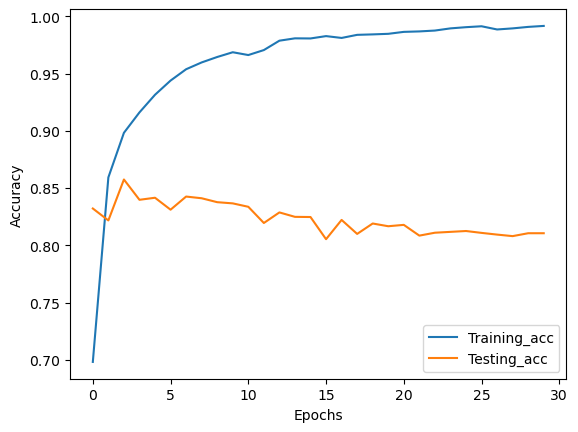

In [11]:
plt.figure()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training_acc', 'Testing_acc'])
plt.show()

## LSTM

In [13]:
ls_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 2 layer LSTM
ls2_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [15]:
ls_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
ls2_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
ls_history = ls_model.fit(training_padded, training_labels, epochs=3, validation_data=(testing_padded, testing_labels))

Epoch 1/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.9273 - loss: 0.1841 - val_accuracy: 0.8545 - val_loss: 0.3615
Epoch 2/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 32ms/step - accuracy: 0.9659 - loss: 0.0959 - val_accuracy: 0.8495 - val_loss: 0.4193
Epoch 3/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 32ms/step - accuracy: 0.9832 - loss: 0.0538 - val_accuracy: 0.8438 - val_loss: 0.5324


In [18]:
ls2_history = ls2_model.fit(training_padded, training_labels, epochs=3, validation_data=(testing_padded, testing_labels))

Epoch 1/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step - accuracy: 0.7496 - loss: 0.4754 - val_accuracy: 0.8536 - val_loss: 0.3307
Epoch 2/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 31s 49ms/step - accuracy: 0.9328 - loss: 0.1784 - val_accuracy: 0.8504 - val_loss: 0.3867
Epoch 3/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 31s 49ms/step - accuracy: 0.9668 - loss: 0.0941 - val_accuracy: 0.8474 - val_loss: 0.4969
